# Houses Kaggle Competition (revisited with Deep Learning 🔥) 

[<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/ML/kaggle-batch-challenge.png' width=600>](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

⚙️ Let's re-use our previous **pipeline** built in the module **`05-07-Ensemble-Methods`** and try to improve our final predictions with a Neural Network!

## (0) Libraries and imports

In [110]:
%load_ext autoreload
%autoreload 2

# DATA MANIPULATION
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# VIEWING OPTIONS IN THE NOTEBOOK
from sklearn import set_config; set_config(display='diagram')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## (1) 🚀 Getting Started

### (1.1) Load the datasets

💾 Let's load our **training dataset**

In [111]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv")
X = data.drop(columns='SalePrice')
y = data['SalePrice']

In [112]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [113]:
X.shape, y.shape

((1460, 80), (1460,))

💾 Let's also load the **test set**

❗️ Remember ❗️ You have access to `X_test` but only Kaggle has `y_test`

In [114]:
X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")

In [115]:
X_test.shape

(1459, 80)

### (1.2) Train/Val Split

❓ **Holdout** ❓ 

As you are not allowed to use the test set (and you don't have access to `y_test` anyway), split your dataset into a training set and a validation set.

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (1168, 80)
X_val shape: (292, 80)
y_train shape: (1168,)
y_val shape: (292,)


### (1.3) Import the preprocessor

🎁 You will find in `utils/preprocessor.py` the **`data-preprocessing pipeline`** that was built in our previous iteration.

❓ Run the cell below, and make sure you understand what the pipeline does. Look at the code in `preprocessor.py` ❓

In [117]:
from utils.preprocessor import create_preproc

preproc = create_preproc(X_train)
preproc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'BsmtUnfSF',
                                                   'EnclosedPorch',
                                                   'Fireplaces', 'FullBath',
                                                   'GarageArea', 'GarageCars...
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x7f4cea41c160>))])

❓ **Scaling your numerical features and encoding the categorical features** ❓

Apply these transformations to _both_ your training set and your validation set.

In [118]:
# YOUR CODE HERE
preproc.fit(X_train, y_train)
X_train_preprocessed = preproc.transform(X_train)
X_val_preprocessed = preproc.transform(X_val)


## (2) 🔮 Your predictions in Tensorflow/Keras

🚀 This is your first **regression** task with Keras! 

💡 Here a few tips to get started:
- Kaggle's [rule](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) requires to minimize **`rmsle`** (Root Mean Square Log Error). 
    - As you can see, we can specify `msle` directly as a loss-function with Tensorflow.Keras!
    - Just remember to take the square-root of your loss results to read your rmsle metric.
    
    
😃 The best boosted-tree ***rmsle*** score to beat is around ***0.13***

---

<img src="https://i.pinimg.com/564x/4c/fe/ef/4cfeef34af09973211f584e8307b433c.jpg" alt="`Impossible mission" style="height: 300px; width:500px;"/>

---


❓ **Your mission, should you choose to accept it:** ❓
- 💪 Beat the best boosted-tree 💪 

    - Your responsibilities are:
        - to build the ***best neural network architecture*** possible,
        - and to control the number of epochs to ***avoid overfitting***.

### (2.1) Predicting the houses' prices using a Neural Network

❓ **Preliminary Question: Initializing a Neural Network** ❓

Create a function `initialize_model` which initializes a Dense Neural network:
- You are responsible for designing the architecture (number of layers, number of neurons)
- The function should also compile the model with the following parameters:
    - ***optimizer = "adam"***
    - ***loss = "msle"*** (_Optimizing directly for the Squared Log Error!_)
        

In [119]:
# YOUR CODE HERE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def initialize_model():
    model = Sequential()
    input_dim = X_train_preprocessed.shape[1]
    
    # Add layers to the model
    model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Output layer
    
    # Compile the model
    model.compile(optimizer='adam', loss='msle')
    
    return model


❓ **Questions/Guidance** ❓

1. Initialize a Neural Network
2. Train it
3. Evaluate its performance
4. Is the model overfitting the dataset? 

Epoch 1/50
37/37 [==============================] - 0s 5ms/step - loss: 114.9234 - val_loss: 93.6060
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: 83.3579 - val_loss: 73.7977
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 68.6788 - val_loss: 63.0499
Epoch 4/50
37/37 [==============================] - 0s 2ms/step - loss: 59.6835 - val_loss: 55.5737
Epoch 5/50
37/37 [==============================] - 0s 2ms/step - loss: 53.1492 - val_loss: 49.9905
Epoch 6/50
37/37 [==============================] - 0s 2ms/step - loss: 48.1904 - val_loss: 45.6581
Epoch 7/50
37/37 [==============================] - 0s 2ms/step - loss: 44.2688 - val_loss: 42.1645
Epoch 8/50
37/37 [==============================] - 0s 2ms/step - loss: 41.0558 - val_loss: 39.2520
Epoch 9/50
37/37 [==============================] - 0s 2ms/step - loss: 38.3492 - val_loss: 36.7699
Epoch 10/50
37/37 [==============================] - 0s 2ms/step - loss: 36.0115 - val_loss: 34.589

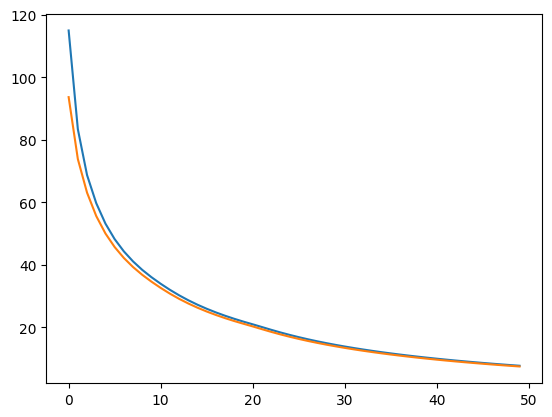

In [120]:
# YOUR CODE HERE
model = initialize_model()
history = model.fit(X_train_preprocessed, y_train, epochs=50, batch_size=32, validation_data=(X_val_preprocessed, y_val))
loss = model.evaluate(X_val_preprocessed, y_val)
print("Validation Loss:", loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')


🎁 We coded a `plot_history` function that you can use to detect overfitting

In [121]:
def plot_history(history):
    plt.plot(np.sqrt(history.history['loss']))
    plt.plot(np.sqrt(history.history['val_loss']))
    plt.title('Model Loss')
    plt.ylabel('RMSLE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()

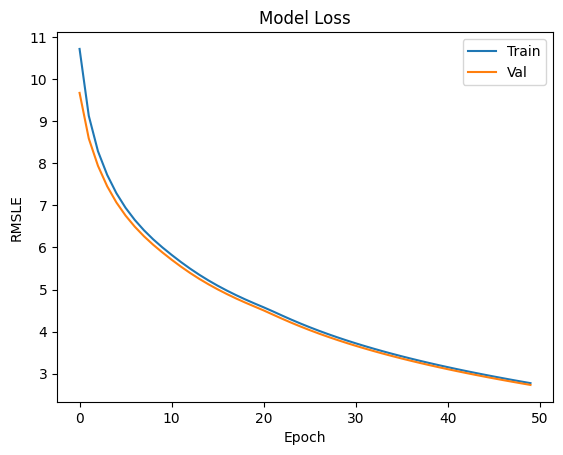

In [122]:
# YOUR CODE HERE
plot_history(history)

### (2.2) Challenging yourself

🤔 **Questions to challenge yourself:**
- Are you satisfied with your score?
- Before publishing it, ask yourself whether you could really trust it or not?
- Have you cross-validated your neural network? 
    - Feel free to cross-validate it manually with a *for loop* in Python to make sure that your results are robust against the randomness of a _train-val split_ before before submitting to Kaggle

❓ Create a function `evaluate_model` following the framework below 👇 then use a for loop with `KFold` to manually cross validate your model!

In [123]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.compose import ColumnTransformer



### (2.3) (Bonus) Using all your CPU cores to run Neural Networks

🔥 **BONUS** 🔥 **Multiprocessing computing using [dask](https://docs.dask.org/en/latest/delayed.html)** and **all your CPU cores**:

_(to mimic SkLearn's `n_jobs=-1`)_

In [124]:
# !pip install --quiet dask

### (2.4) (Bonus) Multiprocessing with Python


**multiprocessing with default Python library**

References :
* [Yitong Ren - Speeding Up and Perfecting Your Work Using Parallel Computing](https://towardsdatascience.com/speeding-up-and-perfecting-your-work-using-parallel-computing-8bc2f0c073f8)
* [Johaupt Github - Parallel Processing for Cross Validation - BROKEN LINK](https://johaupt.github.io/python/parallel%20processing/cross-validation/multiprocessing_cross_validation.html)

<details>
    <summary markdown='span'>Hints</summary>

This is a limitation of multiprocessing in ipython enviroments this code would work fine in .py file.
The key error is `AttributeError: Can't get attribute 'evaluate_model' on <module 'main' (built-in)>`

Checkout this stackoverflow for a workaround https://stackoverflow.com/questions/41385708/multiprocessing-example-giving-attributeerror !
</details>

## (3) 🏅FINAL SUBMISSION

🦄 Predict the ***prices of the houses in your test set*** and submit your results to Kaggle! 



In [125]:
# X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")
# X_test_preproc = preproc.transform(X_test)
# ALREADY DONE ABOVE

In [126]:
# YOUR CODE HERE

💾 Save your predictions in a Dataframe called `results` with the format required by Kaggle so that when you export it to a `.csv`, Kaggle can read it.

In [127]:
# YOUR CODE HERE

📤  Export your results using Kaggle's submission format and submit it online!

_(Uncomment the last cell of this notebook)_

In [128]:
# results.to_csv("submission_final.csv", header = True, index = False)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... it's time for the Recap!